In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
path="C:/Users/joseph/Documents/malayalam OCR/data as numpy files"
files=os.listdir(path)

In [31]:
newx=[]
newy=[]

In [4]:
def dataset(n,m):
    for i in range(n):
        x=np.load(path+'/'+files[i])
        if i+51>=len(files):
            break
        y=np.load(path+'/'+files[i+51])
        for j in range(m):
            newx.append(x[j])
            newy.append(y[j])
    return(print("your sub array has been created"))        
    
    

In [32]:
dataset(51,80)

your sub array has been created


In [6]:
def reshape(arr):
    imar=[]
    for i in arr:
        img=i.reshape(300,300)
        img=cv2.resize(img,(50,50))
        imar.append(img)
    return(imar)
    

In [33]:
newx=reshape(newx)

In [34]:
newx=np.array(newx)
newx=newx/255

(50, 50)

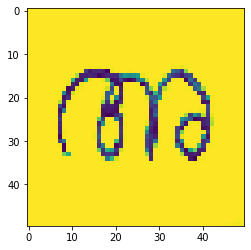

In [25]:
plt.imshow(newx[0])
newx[0].shape

In [35]:
arr=[]
for i in newy:
    i=i-1
    arr.append(i)
newy=arr    

In [11]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [36]:
newY = to_categorical(newy)

In [37]:
x_train, x_val, y_train, y_val = train_test_split(newx, newY, test_size = 0.2, random_state=20)

In [38]:
x_train = x_train.reshape(-1,50,50,1)
x_val = x_val.reshape(-1,50,50,1)

In [89]:
#CNN

In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (50,50,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(51, activation = "softmax"))

W0902 22:46:50.168524  2012 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [39]:
model.fit(x_train, y_train,batch_size=10,epochs=20,validation_data=(x_val, y_val))


Train on 3264 samples, validate on 816 samples
Epoch 1/20
3264/3264 [==============================] - 4s 1ms/sample - loss: 0.4277 - acc: 0.8897 - val_loss: 0.1567 - val_acc: 0.9534
Epoch 2/20
3264/3264 [==============================] - 4s 1ms/sample - loss: 0.2476 - acc: 0.9292 - val_loss: 0.1564 - val_acc: 0.9608
Epoch 3/20
3264/3264 [==============================] - 4s 1ms/sample - loss: 0.1992 - acc: 0.9424 - val_loss: 0.1390 - val_acc: 0.9632
Epoch 4/20
3264/3264 [==============================] - 4s 1ms/sample - loss: 0.1440 - acc: 0.9571 - val_loss: 0.1601 - val_acc: 0.9596
Epoch 5/20
3264/3264 [==============================] - 4s 1ms/sample - loss: 0.1355 - acc: 0.9565 - val_loss: 0.1664 - val_acc: 0.9596
Epoch 6/20
3264/3264 [==============================] - 4s 1ms/sample - loss: 0.1090 - acc: 0.9635 - val_loss: 0.1616 - val_acc: 0.9559
Epoch 7/20
3264/3264 [==============================] - 4s 1ms/sample - loss: 0.1161 - acc: 0.9626 - val_loss: 0.1825 - val_acc: 0.9559
E

In [15]:
from tensorflow.keras.models import load_model

In [40]:
model.save('model80.h5')


In [19]:
model = load_model('model70.h5')

In [55]:
img=cv2.imread("1,0.JPG",0)


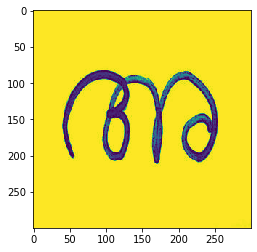

In [56]:
plt.imshow(img)

In [57]:
img=cv2.resize(img,(50,50))
img=img/255

In [58]:
img=img.reshape(-1,50,50,1)

In [60]:
model.predict_classes(img)

array([0], dtype=int64)